In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\\Learn\\Uni\\ML\\CapstoneProject\\data\\healthcare-dataset-stroke-data.csv")

In [3]:
missing_value = 100 * df.isnull().sum()/len(df)
missing_value = missing_value.reset_index()
missing_value.columns = ['variables','missing values in percentage']
missing_value = missing_value.sort_values('missing values in percentage',ascending=False)

# barplot
fig = px.bar(missing_value, y='missing values in percentage',x='variables',title='Missing values % in each column',
             template='ggplot2',text='missing values in percentage');
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


fig.show()

In [13]:
df['bmi'].isna().sum()

201

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

gender
Female    2992
Male      2111
Other        1
Name: count, dtype: int64


In [6]:
round (df.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5104,5104,5104,5104,5104
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2992,3348,2920,2594,1892


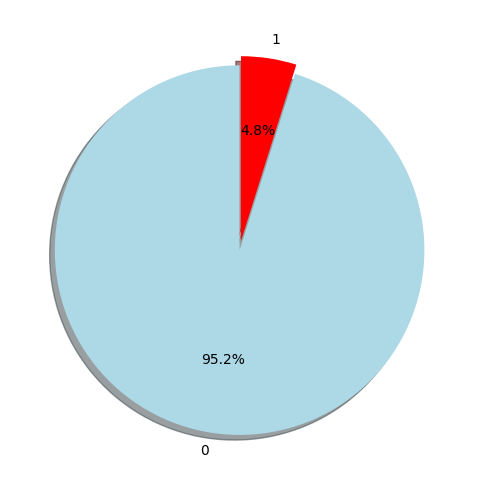

In [7]:
labels = df['stroke'].value_counts(sort=True).index
sizes = df['stroke'].value_counts(sort=True)

color = ["lightblue","red"]
explode = (0.05,0)

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=color, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

Our dataset is imbalance 

In [8]:
le = LabelEncoder()
en_df = df.apply(le.fit_transform)
en_df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,671,1,88,0,1,1,2,1,3848,239,1,1
1,3607,0,82,0,0,1,3,0,3587,418,2,1
2,2151,1,101,0,1,1,2,0,2482,198,2,1
3,4222,0,70,0,0,1,2,1,3384,217,3,1
4,114,0,100,1,0,1,3,0,3393,113,2,1


In [9]:
def plot_hist(col, bins=30, title="", xlabel="", ax=None):
    sns.distplot(col, bins=bins, ax=ax)
    ax.set_title(f'Histogram of {title}', fontsize=20)
    ax.set_xlabel(xlabel)

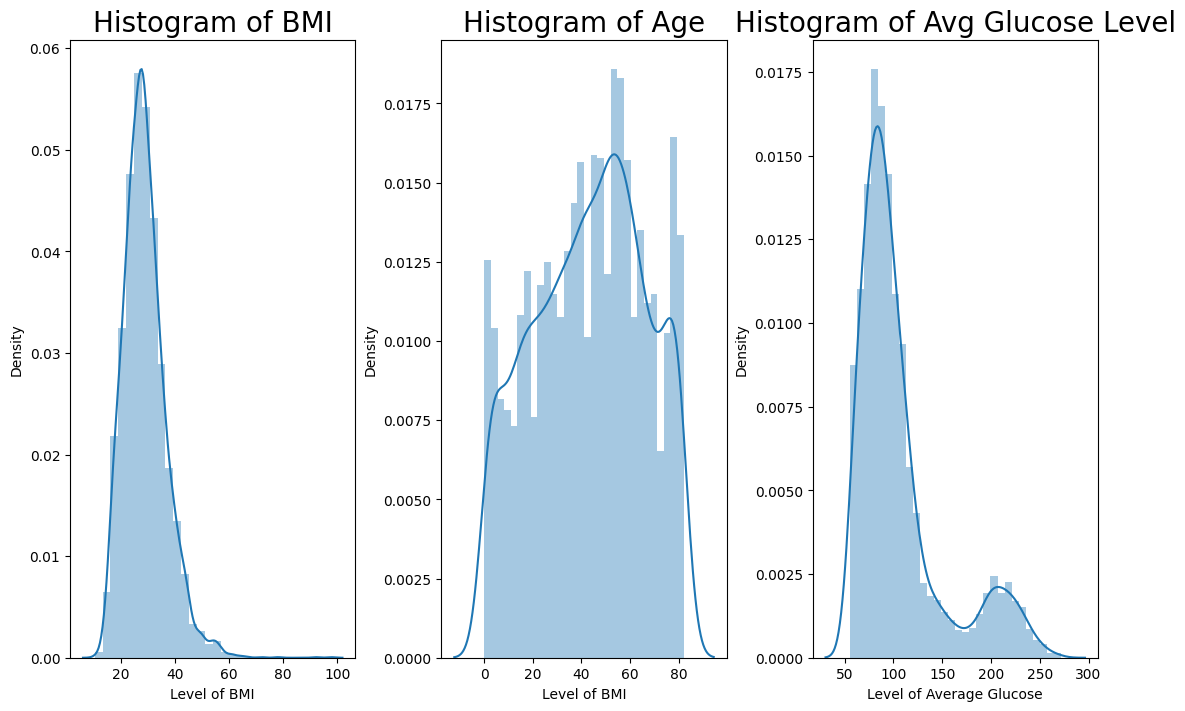

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(11, 7), constrained_layout=True)

plot_hist(df['bmi'], title='BMI', xlabel="Level of BMI", ax=axes[0])
plot_hist(df['age'], title='Age', xlabel="Level of BMI", ax=axes[1])
plot_hist(df['avg_glucose_level'], title='Avg Glucose Level', xlabel="Level of Average Glucose", ax=axes[2])

plt.show()

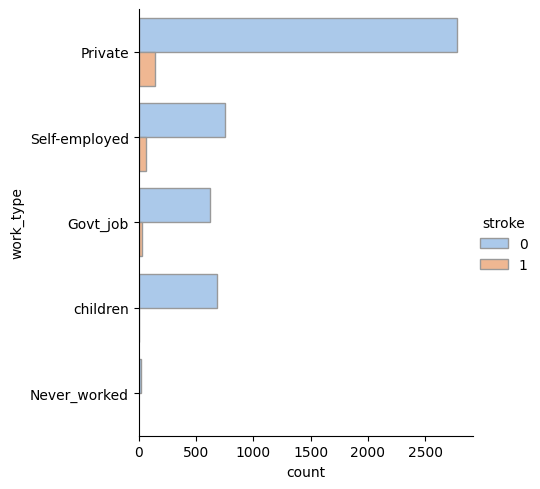

In [11]:
sns.catplot(y='work_type', hue='stroke', kind='count', palette='pastel', edgecolor='.6', data=df)
plt.show()

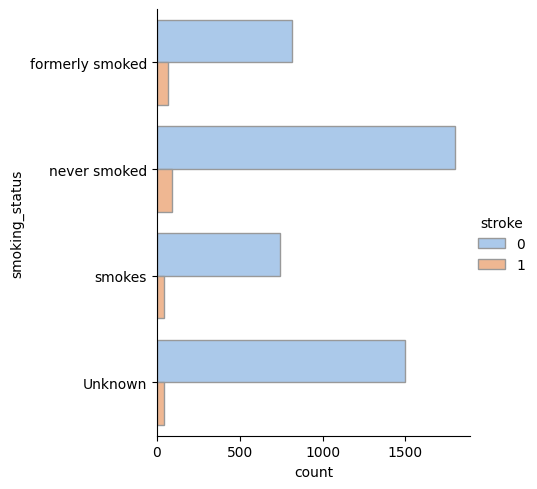

In [12]:
sns.catplot(y='smoking_status', hue="stroke", kind='count', palette='pastel', edgecolor='.6', data=df)
plt.show()